In [ ]:
!pip install scikit-fuzzy

     |████████████████████████████████| 1.0MB 9.4MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp36-none-any.whl size=894070 sha256=b6ec9ab012b698cbca84070484086de9579f7a036e1b91e6e7d422a302b43d55
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy


### Importando pacotes

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

### Criando Antecedent e Consequent

In [ ]:
quality = ctrl.Antecedent(np.arange(0, 11, 1), "quality")
service = ctrl.Antecedent(np.arange(0, 11, 1), "service")

tip = ctrl.Consequent(np.arange(0, 26, 1), "tip")

quality.automf(3)
service.automf(3)

tip["low"] = fuzz.trimf(tip.universe, [0, 0, 13])
tip["medium"] = fuzz.trimf(tip.universe, [0, 13, 25])
tip["high"] = fuzz.trimf(tip.universe, [13, 25, 25])

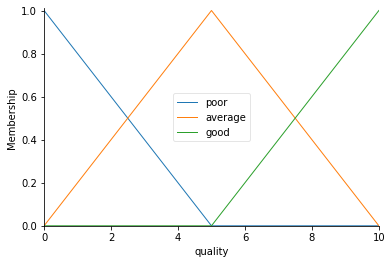

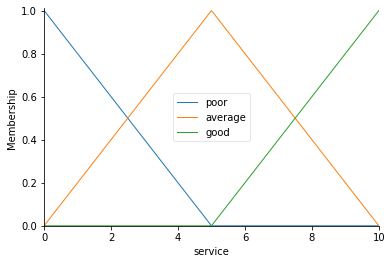

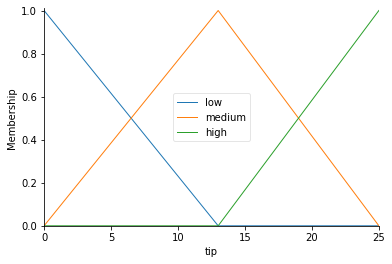

In [ ]:
quality.view()
service.view()
tip.view()

### Criando Regras

In [ ]:
rule1 = ctrl.Rule(service["poor"] | quality["poor"], tip["low"])
rule2 = ctrl.Rule(service["average"], tip["medium"])
rule3 = ctrl.Rule(service["good"] | quality["good"], tip["high"])

### Criando Sistema

In [ ]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

In [ ]:
tipping.input["quality"] = 3.5
tipping.input["service"] = 4.8

tipping.compute()

12.15496380010595


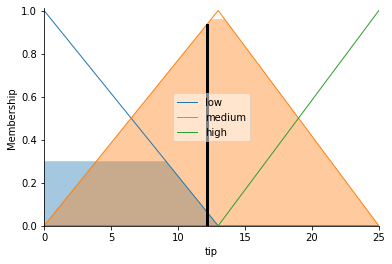

In [ ]:
print(tipping.output["tip"])
tip.view(sim=tipping)
